In [ ]:
!pip install moviepy
!pip install -U openai-whisper
!pip install pydub
!pip install key-frame-detector

  Using cached openai-whisper-20231117.tar.gz (798 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-1

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
cwd = os.path.join('drive', 'MyDrive','Working Log','Videos')
print(cwd)
os.chdir(cwd)
# video_file = 'Working log/Code from Schwenzow et al. (2021)/example_video.mp4'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/MyDrive/video_analysis


# 1) Genertate an audio in wav format from a video

In [ ]:
### Python code to convert video to audio ###
import moviepy.editor as mp
video_file = '2ED1-HR-ToddWagner2_L.mp4'

# Insert Local Video File Path
clip = mp.VideoFileClip(video_file)

# Insert Local Audio File Path
clip.audio.write_audiofile(video_file.replace('mp4','wav'))

MoviePy - Writing audio in 2ED1-HR-ToddWagner2_L.wav


MoviePy - Done.


# 1.2) Process the audio so that no silent chunks remain (for getting transcript of high quality at later step)

In [ ]:
### Process the audio so that no silent chunks remain ###
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Load your audio file
video_file = '2ED1-HR-ToddWagner2_L.mp4'
audio = AudioSegment.from_wav(video_file.replace('mp4','wav'))

# Split audio on silence
chunks = split_on_silence(
    audio,
    # experiment with these values based on your specific needs
    min_silence_len=500,
    silence_thresh=audio.dBFS-14,
    keep_silence=200
)

# Create a new audio file without silence
processed_audio = AudioSegment.silent(duration=0)
for chunk in chunks:
    processed_audio += chunk

# Export the processed audio
processed_audio.export("processed_audio2.wav", format="wav")
# 20s

<_io.BufferedRandom name='processed_audio2.wav'>

# 2) Extract transcript from the processed audio
## GPU is required. (T4 GPU is enough)

In [ ]:
### Convert the audio to text ###
import whisper
# audio_file = 'processed_audio2.wav'

model = whisper.load_model("medium")
result = model.transcribe("processed_audio2.wav")
result["text"] # 53s for gpu

100%|██████████████████████████████████████| 1.42G/1.42G [00:13<00:00, 113MiB/s]


 Let me just get a quick comment from you about Facebook. Since that's what was just mentioned, what do you make of what's going on with them? Zuckerberg and where they think they're going to go, whether they're going to figure out mobile? I think, you know, I think that's the question of the day. Again, they are, we tend to say what's next. They are an amazing success story, but it is too early to call where that company goes. It's just too early. Okay, well, let's take a step back for a moment, talk about the bigger issues in the market, that of course, jobs, the economy, even the sequester, the deficit as well. I know you have thoughts on all of these things. I mean, these are the kind of things that a multifaceted investor thinks about. Well, I'm very passionate about this stuff. You know, I believe that our government should intertwine the education and economy in one package. They should almost be places that are merged together in how they respond to things. We no longer have th

# 3) Extract key frames from a Video (Save to your working directory defined below)
## Run it separately from the previous code to prevent "out of memory" error.

In [2]:
!pip install peakutils

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
cwd = os.path.join('drive', 'MyDrive','Working Log','Videos')
print(cwd)
os.chdir(cwd)
# video_file = 'Working log/Code from Schwenzow et al. (2021)/example_video.mp4'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/MyDrive/video_analysis


number of total frames: 8162


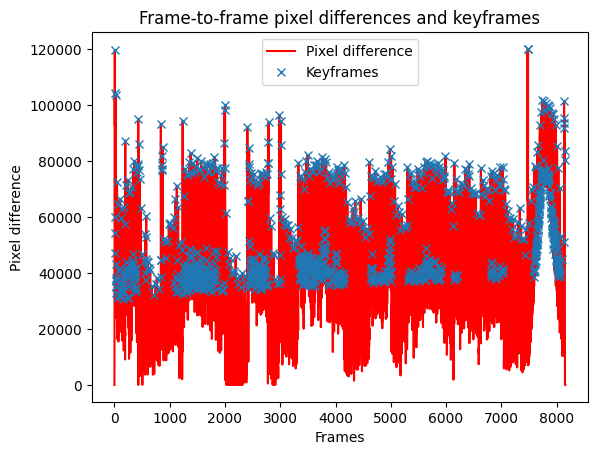

Keyframe 1 saved at key_frames_output/keyFrames/keyframe1.jpg
Keyframe 2 saved at key_frames_output/keyFrames/keyframe2.jpg
Keyframe 3 saved at key_frames_output/keyFrames/keyframe3.jpg
Keyframe 4 saved at key_frames_output/keyFrames/keyframe4.jpg
Keyframe 5 saved at key_frames_output/keyFrames/keyframe5.jpg
Keyframe 6 saved at key_frames_output/keyFrames/keyframe6.jpg
Keyframe 7 saved at key_frames_output/keyFrames/keyframe7.jpg
Keyframe 8 saved at key_frames_output/keyFrames/keyframe8.jpg
Keyframe 9 saved at key_frames_output/keyFrames/keyframe9.jpg
Keyframe 10 saved at key_frames_output/keyFrames/keyframe10.jpg
Keyframe 11 saved at key_frames_output/keyFrames/keyframe11.jpg
Keyframe 12 saved at key_frames_output/keyFrames/keyframe12.jpg
Keyframe 13 saved at key_frames_output/keyFrames/keyframe13.jpg
Keyframe 14 saved at key_frames_output/keyFrames/keyframe14.jpg
Keyframe 15 saved at key_frames_output/keyFrames/keyframe15.jpg
Keyframe 16 saved at key_frames_output/keyFrames/keyframe1

In [4]:
import os
import cv2
import csv
import numpy as np
import time
import peakutils
import matplotlib.pyplot as plt

def prepare_dirs(dest):
    directories = ['keyFrames', 'imageGrids', 'csvFile']
    paths = {d: os.path.join(dest, d) for d in directories}
    for path in paths.values():
        if not os.path.exists(path):
            os.makedirs(path)
    return paths

def plot_metrics(indices, lstfrm, lstdiffMag):
    plt.plot(lstfrm, lstdiffMag, 'r-', label='Pixel difference')
    plt.plot(np.array(lstfrm)[indices], [lstdiffMag[i] for i in indices], "x", label='Keyframes')
    plt.xlabel('Frames')
    plt.ylabel('Pixel difference')
    plt.title("Frame-to-frame pixel differences and keyframes")
    plt.legend()
    plt.show()

def keyframe_detection(source, dest, threshold, plot_metrics_flag=False, verbose=False):
    paths = prepare_dirs(dest)
    cap = cv2.VideoCapture(source)
    if not cap.isOpened():
        print("Error opening video file")
        return

    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print("number of total frames:", length)
    diff_magnitudes, timestamps = [], []
    frames_for_keyframes = []
    last_frame = None
    start_time = time.process_time()

    for i in range(length):
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray_blur = cv2.GaussianBlur(gray_frame, (21, 21), 0)

        if last_frame is not None:
            diff = cv2.absdiff(gray_blur, last_frame)
            diff_mag = cv2.countNonZero(diff)
            diff_magnitudes.append(diff_mag)

        timestamps.append(time.process_time() - start_time)
        last_frame = gray_blur

    cap.release()

    y = np.array(diff_magnitudes)
    baseline = peakutils.baseline(y, 2)
    indices = peakutils.indexes(y - baseline, threshold, min_dist=1)

    if plot_metrics_flag:
        plot_metrics(indices, list(range(len(diff_magnitudes))), diff_magnitudes)

    # Second pass: Extract and save key frames
    cap = cv2.VideoCapture(source)
    key_frames_saved = 0
    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame_path = os.path.join(paths['keyFrames'], f'keyframe{key_frames_saved+1}.jpg')
            cv2.imwrite(frame_path, frame)
            if verbose:
                print(f'Keyframe {key_frames_saved+1} saved at {frame_path}')
            key_frames_saved += 1

    cap.release()

    # Save CSV with timestamps
    with open(os.path.join(paths['csvFile'], 'output.csv'), mode='w', newline='') as file:
        writer = csv.writer(file)
        for i, frame_index in enumerate(indices):
            log_message = [f'Keyframe {i+1}', f'occurred at {timestamps[frame_index]} sec']
            writer.writerow(log_message)

    cv2.destroyAllWindows()

# Example usage
# 55s
keyframe_detection('2ED1-HR-ToddWagner2_L.mp4', # video path
                   dest='key_frames_output', # destination folder
                   threshold=0.3, plot_metrics_flag=True, verbose=True)


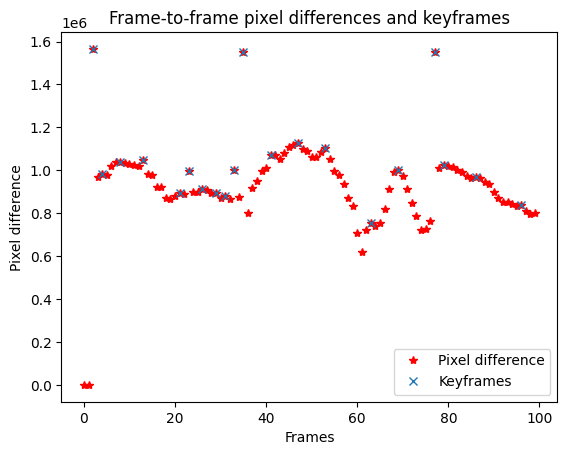

In [25]:
def plot_metrics(indices, lstfrm, lstdiffMag):
    # print(lstfrm[indices])
    # print([lstdiffMag[i] for i in indices])
    plt.plot(lstfrm, lstdiffMag, 'r*', label='Pixel difference')
    plt.plot(np.array(lstfrm)[indices], [lstdiffMag[i] for i in indices], "x", label='Keyframes')
    plt.xlabel( 'Frames')
    plt.ylabel('Pixel difference')
    plt.title("Frame-to-frame pixel differences and keyframes")
    plt.legend()
    plt.show()
plot_metrics(indices[:20], list(range(len(diff_magnitudes)))[:100], diff_magnitudes[:100])